# Набор данных MNIST

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from collections import Counter

### Чтобы сократить время обучения модели будем использовать только тестовую часть оригинального набора, чтобы сокрвтить время обучения моделей.

In [ ]:
from keras.datasets import mnist #рукописная база данных с написанием цифр
import warnings
warnings.filterwarnings('ignore')
(_,_), (X, y) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


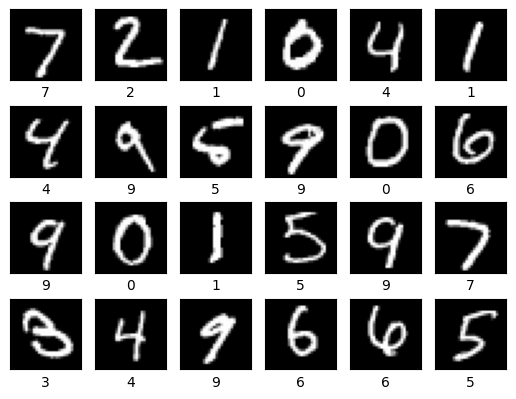

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
  axi.imshow(X[i], cmap = 'gray')
  axi.set(xticks=[], yticks=[])
  axi.set_xlabel(y[i], color='black')

In [ ]:
print(X.shape)

(10000, 28, 28)


In [ ]:
random_state = 33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=random_state)

In [ ]:
#Распрямим изображение и получим алгоритм kmeans
kmeans = KMeans(n_clusters=10, random_state=random_state)
clusters = kmeans.fit_predict(X_train.reshape(-1, 784))

In [ ]:
#Определяем число  элементоаБ отнесенных к нашему кластеру
print(dict(Counter(clusters)))

{2: 876, 3: 712, 1: 1006, 8: 702, 0: 949, 6: 1082, 4: 616, 5: 660, 7: 656, 9: 741}


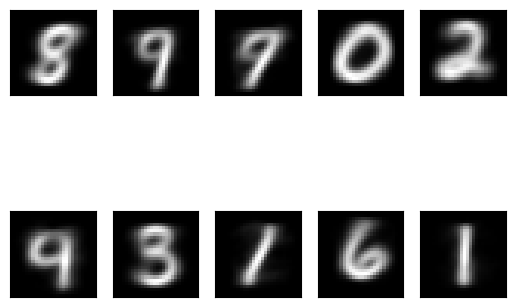

In [ ]:
#Построим изображение, соответствующее центроидам полученных кластеров
fig, ax = plt.subplots(2, 5)
centers = kmeans.cluster_centers_.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks = [], yticks= [])
  axi.imshow(center, cmap='gray')

In [ ]:
#может возникать ошибка в коде из за того, что переменная mode_value  является целым числом, а не массивом, поэтому мы не можем использовать [0]
from scipy.stats import mode
import numpy as np

corrested_cluster = np.zeros_like(kmeans.labels_)
cluster_values = []
for i in range(10):
  mask = (kmeans.labels_ == i)
  mode_value = mode(y_train[mask])[0].item()
  corrested_cluster[mask] = mode_value
  cluster_values.append(mode_value)

#Метки кластера после преобразования

print(cluster_values)

[8, 9, 7, 0, 2, 4, 3, 1, 6, 1]


In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train, corrested_cluster))

0.591375


### Произведем кластеризацию на тестовых данных:

In [ ]:
cluster_test = kmeans.predict(X_test.reshape(-1, 784))
label_test = np.zeros_like(cluster_test)
for i in range(10):
  mask = (cluster_test == 1)
  label_test[mask] = cluster_values[i]

In [ ]:
#Кластеризация для тестового набора данных
print(accuracy_score(y_test,label_test ))

0.0905


### Построим матрицу ошибок:

In [ ]:
#Распределение тестовых даных с переназначенными метками
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, label_test)
print(mat)

[[181   1   0   0   0   0   0   0   0   0]
 [217   0   0   0   0   0   0   0   0   0]
 [199   5   0   0   0   0   0   0   0   0]
 [219   4   0   0   0   0   0   0   0   0]
 [142  42   0   0   0   0   0   0   0   0]
 [183   7   0   0   0   0   0   0   0   0]
 [202   0   0   0   0   0   0   0   0   0]
 [116  82   0   0   0   0   0   0   0   0]
 [179   6   0   0   0   0   0   0   0   0]
 [112 103   0   0   0   0   0   0   0   0]]


In [ ]:
pred_lbls = (cluster_values)
full_set = set(range(10))
missed_digit = list(full_set.difference(pred_lbls))[0]
print(missed_digit)
print(np.argmax(mat[missed_digit]))

5
0


In [ ]:
#Кластеризация для тестового набора данных
print(accuracy_score(y_test,label_test ))

0.0975


### Преобразуем тренировочный набор данных при помощи метода TSNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', random_state=25)
X_tsne = tsne.fit_transform(X_train.reshape(-1, 784))

kmeans_tsne = KMeans(n_clusters=10, random_state=25)
clusters = kmeans_tsne.fit_predict(X_tsne)

# Переназначаем метки кластеров
cluster_labels_tsne = np.zeros_like(clusters)
for i in range(10):
  mask = (clusters == i)
  cluster_labels_tsne[mask] = mode(y_train[mask])[0]

accuracy_tsne = accuracy_score(y_train, cluster_labels_tsne)
print(accuracy_tsne)


0.8165


# Работа с RGD

In [ ]:
!pip install google-colab

In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

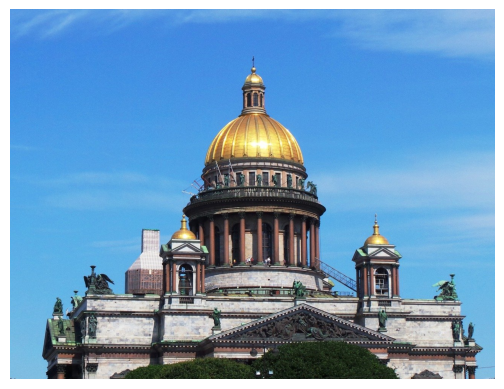

In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/MB school/spb_st_isaacs_2.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

### Перед нами трехканальное (RGB) изображение. Вычислим среднее значение интенсивности пикселей по всем каналам.

In [ ]:
#форма изображений пикселей(3 размерность по цветам)
print(img.shape)

(976, 1280, 3)


In [ ]:
print(img.mean())

140.9997785391052


### Нормализуем значение интенсивности пикселей

In [ ]:
r, g, b = img.shape
data = img/255
print(data.mean())
data = data.reshape(r*g, b)

0.552940307996491


### Давайте убедимся в том, что исходное пространство цветов, насчитывающее около $16$ миллионов возможных состояний ($256^3$), слишком велико, и его размерность можно понижать. Для наглядности построим лишь некоторые подвыборки зависимостей значений интенсивностей и лишь на случайном поднаборе пикселей.



In [ ]:
def plot_pixel(data, colors=None, N=10000):
  if colors is None:
    colors=data

  rng = np.random.RandomState(0)
  i = rng.permutation(data.shape[0])[:N]
  colors = colors[i]
  R, G, B = data[i].T

  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
  ax[0].scatter(R, G, color=colors, marker=('.'))
  ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

  ax[1].scatter(R, B, color=colors, marker='.')
  ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

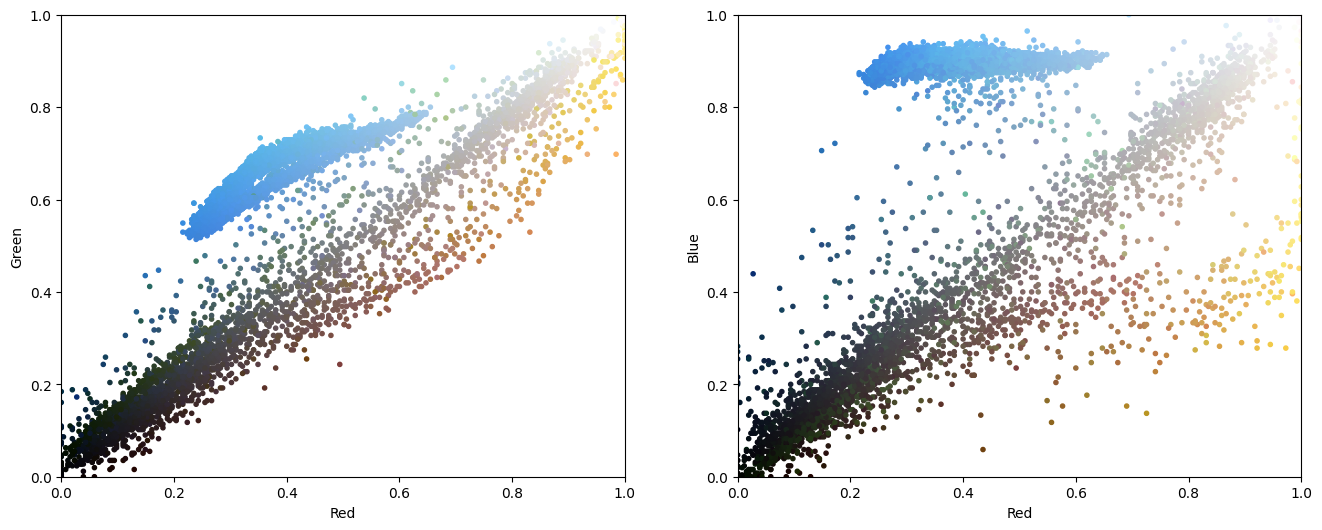

In [ ]:
plot_pixel(data)

### Обучим модель <code>MiniBatchKMeans</code> на нормированном и «распрямленном» изображении с параметрами.

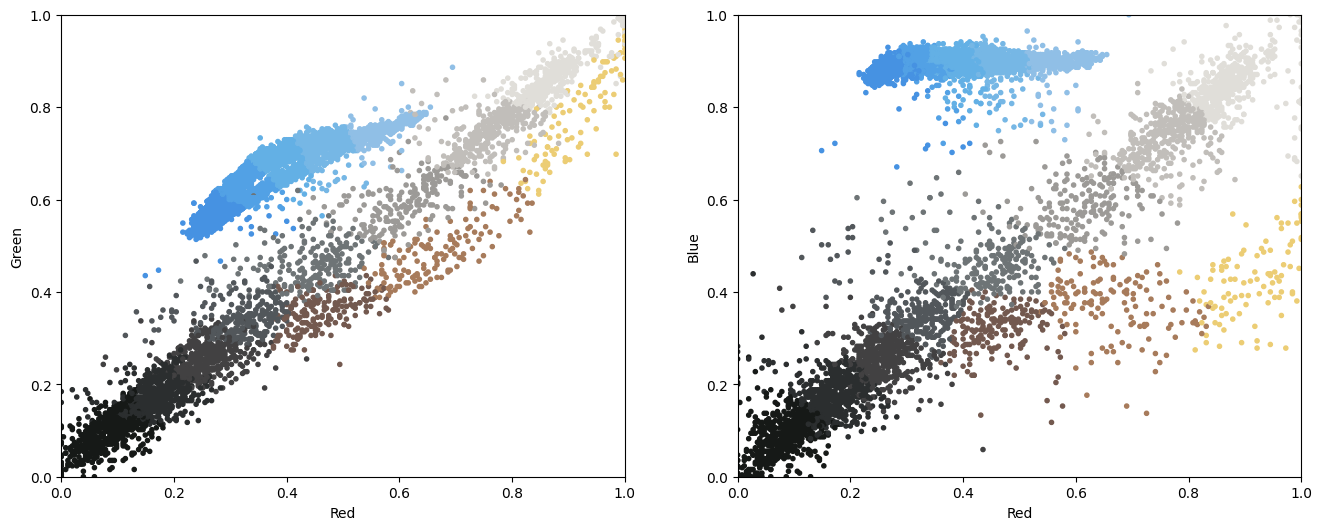

In [ ]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters=16, random_state=10)
kmeans.fit(data)

new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixel(data, colors=new_colors)

In [ ]:
#вычислим среднее значение
print(np.mean(new_colors))

0.5538263185029294


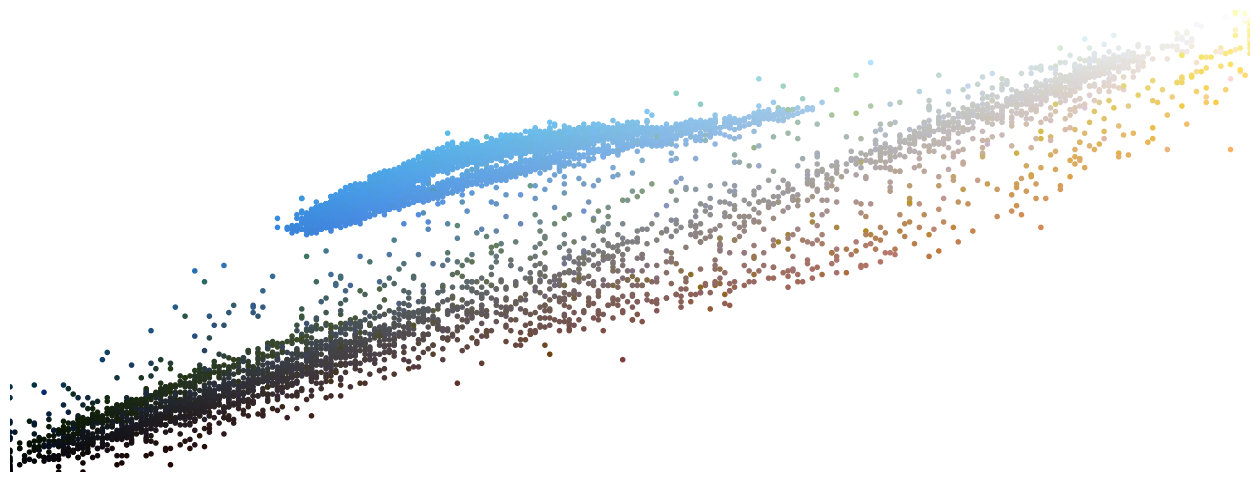

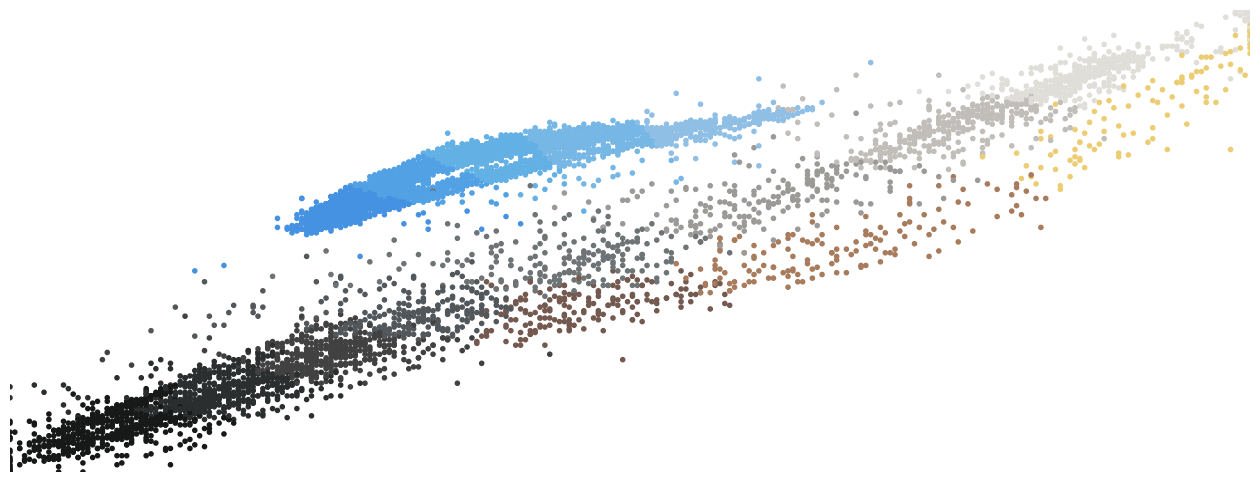

In [ ]:
#Построим график зависимостей
def plot_pixel_for_task(data, colors=None, N=10000, f_name=None):
  if colors is None:
    colors = data

  rng = np.random.RandomState(0)
  i = rng.permutation(data.shape[0])[:N]
  colors = colors[i]
  R, G, B = data[i].T

  fig, ax = plt.subplots(1, 1, figsize=(16, 6))
  ax.scatter(R, G, color=colors, marker=('.'))
  ax.set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
  plt.axis('off')
  plt.savefig(f_name, dpi=300)

plot_pixel_for_task(data, f_name='Clust_RG_palette_1.png')
plot_pixel_for_task(data, colors=new_colors, f_name='Clust_RG_palette_2.png')

### Строим оригинальное изображение и изображение, где используется только 16 цветов

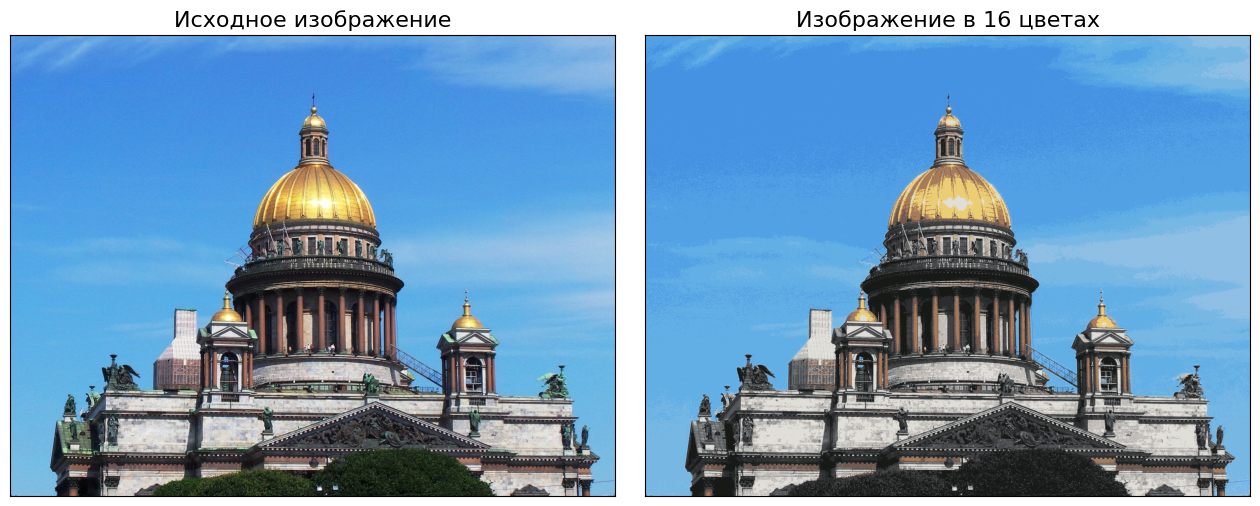

In [ ]:
img_recolored = new_colors.reshape(img.shape)
fig ,ax = plt.subplots(1, 2, figsize=(16,6), subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img)
ax[0].set_title('Исходное изображение', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('Изображение в 16 цветах', size=16);

### Построим изображение размера $4 \times 4$ на основе полученных $16$ цветов.

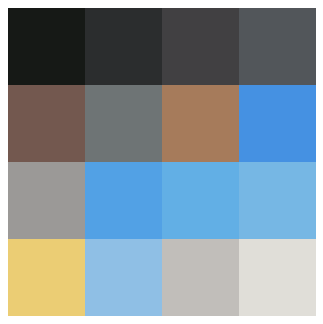

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(5,5), dpi=80)
colors = np.unique(img_recolored.reshape(-1, img_recolored.shape[2]), axis=0)
colors = sorted(colors,key=sum)
colors = np.array(colors).reshape(4, 4, 3)
plt.axis('off')
plt.imshow(colors)

# Генеративная модель на основе Гаусовских смесей

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
digits.data.shape

(1797, 64)

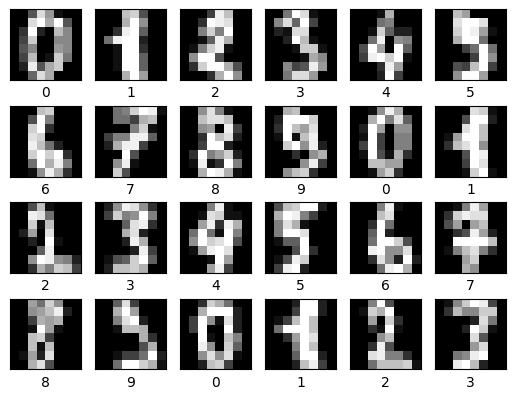

In [ ]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
  axi.imshow(digits.data[i].reshape(8,8), cmap='gray')
  axi.set(xticks=[], yticks=[])
  axi.set_xlabel(digits.target[i], color='black')

In [ ]:
#Снизим разерность пространства признаков
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99, svd_solver='full')
data = pca.fit_transform(digits.data)
data.shape

print('Кол-во главных компонентов: ',data.shape[1])

Кол-во главных компонентов:  41


In [ ]:
# Вычислим значение критерия для каждой модели
from sklearn.mixture import GaussianMixture
from sklearn import mixture
from tqdm.notebook import tqdm

n_components = np.arange(50, 250, 10)
gaussin = [mixture.GaussianMixture(n_components=n,covariance_type='full', random_state=7) for n in n_components]
aics = [model.fit(data).aic(data) for model in tqdm(gaussin)]
best_n_components = n_components[np.argmin(aics)]
print(best_n_components)

  0%|          | 0/20 [00:00<?, ?it/s]

190


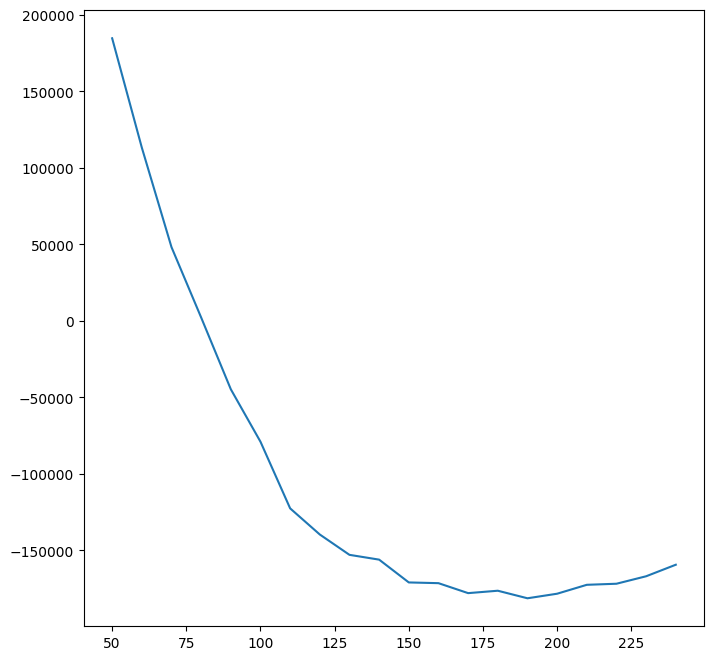

In [ ]:
#Изминение критерия
plt.figure(figsize=(8, 8))
plt.plot(n_components, aics)

### Обучим финальную модель с помощью гиперпарметров , проверим сошлось обучение ли с .converged_

In [ ]:
final_model = mixture.GaussianMixture(best_n_components, covariance_type='full', random_state=7)
final_model.fit(data)
print(final_model.converged_)

True


In [ ]:
data_new, _ = final_model.sample(100)
print(data_new[: ,0].mean())

-0.3302816735341296


При помощи метода inverse_transform() вернем сгенерированные объекты в пространтсво исходных признаков.

In [ ]:
digits_new = pca.inverse_transform(data_new)

### Номер изображения, соответсвующий сгенерированному объекту

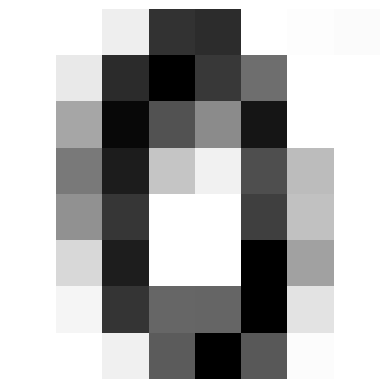

In [ ]:
plt.imshow(digits_new[47].reshape(8,8), cmap = 'binary')
plt.axis('off')
plt.clim(0,16)